## Final Project Submission

Please fill out:
* Student name: James Benedito
* Student pace: Part Time
* Instructor name: Morgan Jones

## Introduction

When purchasing a house, everyone has their non-negotiables. Some people want a big kitchen or backyard. Others may want a basement or 'x' amount of bathrooms. In this Jupyter notebook, I will explore the different variables that impact a home's value. The information in this analysis will be applicable to homeowners who are interested in selling their house, but want to perform renovations on it to increase its market value.

## Business Problem

King County is a county located in Washington state with a population of approximately 2.2 million people, according to the 2022 US Census. As of 2021, the median household income is about $106,000 (https://www.census.gov/quickfacts/kingcountywashington).

A theoretical real estate company in King County has a group of clients looking to sell their homes. They want to be informed and know the factors that increase a house's value; that way, they're aware of the types of renovations to focus on before putting their houses on the market. My data analysis will bring light to the variables that are most impactful to a home's sale price in King County and will thus inform this company and their clients on the types of renovations they should target.

## Goal

My goal is to come up with concrete suggestions based on a multiple linear regression analysis. The final linear regression model will include the variables that are most impactful to a house's sale price, which will serve as the dependent variable of interest throughout the entire exploration process. In other words, the independent variables in my final model will be those that are the best predictors of a house's sale price (the dependent variable). 

## Dataset

The dataset I am using for the analysis is <b>kc_house_data.csv</b>. This dataset includes data on houses in King County, which is where the clients are located.

## Data Exploration

I will begin by exploring the dataset, using the <b>.head()</b> method to visualize the first five rows in a table format. Furthermore, I will use the <b>.info()</b> and <b>.describe()</b> methods to get a better understanding of the overall dataset.

In [1]:
# importing relevant packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
# reading data through pandas
house_data = pd.read_csv('data\\kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# initial exploration of the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

From the <b>.info()</b> method, we see that there are 25 columns and over 30,000 entries in the dataset. The <b>heat_source</b> and <b>sewer_system</b> columns have missing values. In terms of dtype, the dataset contains a mix of integers, float values, and objects (strings). 

In [4]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


The <b>.describe()</b> method shows statistics for 15 columns, which are of dtype integer or float. The columns containing object dtypes are not included in the table generated above. The high amount of numeric variables further supports the idea that a multiple linear regression is the best avenue to go down, as far as analysis is concerned. 

## Data Cleaning 

Before proceeding, I want to address the missing data in the <b>house_data</b> dataframe. As we saw earlier with <b>.info()</b>, the <b>heat_source</b> and <b>sewer_system</b> columns had missing entries. Let's drop any null values from the dataframe using <b>.dropna()</b>.

In [5]:
# dropping null values
house_data = house_data.dropna()
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

We can see that the null values were successfully dropped because the number of entries in the dataframe decreased. Now, let's get rid of any outliers by filtering the data according to the <b>bedrooms</b> and <b>bathrooms</b>. From <b>.describe()</b>, we saw that the max amount of bedrooms was 13 and the max amount of bathrooms was 10.5. This would not make sense for a regular family home that's being renovated, so let's drop any rows that are outside of a 3-standard deviation range from the mean.

In [6]:
# Adapted from Avonlea Fisher
# https://github.com/AvonleaFisher/Predicting-King-County-House-Prices-with-Multiple-Regression-Analysis

# identifying and removing outliers for bathrooms
count = 0
bathroom_outliers = []
mean = np.mean(house_data['bathrooms'])
std_range = np.std(house_data['bathrooms']) * 3 

for index, row in house_data['bathrooms'].T.iteritems():
    if abs(row-mean) >= std_range:
        count += 1
        house_data.drop(index, inplace=True)
count

203

In [7]:
# Adapted from Avonlea Fisher
# https://github.com/AvonleaFisher/Predicting-King-County-House-Prices-with-Multiple-Regression-Analysis

# identifying and removing outliers for bathrooms
count = 0
bedroom_outliers = []
mean = np.mean(house_data['bedrooms'])
std_range = np.std(house_data['bedrooms']) * 3 

for index, row in house_data['bedrooms'].T.iteritems():
    if abs(row-mean) >= std_range:
        count += 1
        house_data.drop(index, inplace=True)
count

148

In [8]:
# checking to see that the outliers were dropped
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29760 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29760 non-null  int64  
 1   date           29760 non-null  object 
 2   price          29760 non-null  float64
 3   bedrooms       29760 non-null  int64  
 4   bathrooms      29760 non-null  float64
 5   sqft_living    29760 non-null  int64  
 6   sqft_lot       29760 non-null  int64  
 7   floors         29760 non-null  float64
 8   waterfront     29760 non-null  object 
 9   greenbelt      29760 non-null  object 
 10  nuisance       29760 non-null  object 
 11  view           29760 non-null  object 
 12  condition      29760 non-null  object 
 13  grade          29760 non-null  object 
 14  heat_source    29760 non-null  object 
 15  sewer_system   29760 non-null  object 
 16  sqft_above     29760 non-null  int64  
 17  sqft_basement  29760 non-null  int64  
 18  sqft_g

Using <b>.info()</b>, we see that the <b>203 bathroom outliers</b> and <b>148 bedroom outliers</b> were dropped from the dataframe successfully.

## Numeric Variables

Next, I will perform a correlation between <b>price</b> and the <b>numeric variables</b> to see which of them have a strong linear relationship with price. I will use the <b>.corr()</b> method to do this.

In [9]:
# performing correlation between price and potential independent variables (int and float dtypes)
house_data.corr()['price']

id              -0.030111
price            1.000000
bedrooms         0.280329
bathrooms        0.444315
sqft_living      0.581339
sqft_lot         0.084360
floors           0.183087
sqft_above       0.508837
sqft_basement    0.212992
sqft_garage      0.241335
sqft_patio       0.294372
yr_built         0.086323
yr_renovated     0.089377
lat              0.065003
long            -0.021228
Name: price, dtype: float64

Based on the results from <b>.corr()</b>, it appears that <b>sqft_living</b> has the strongest correlation with <b>price</b> (r=0.58). This <b>sqft_living</b> variable will be useful for a baseline model.

## Baseline Model

As mentioned previously, <b>sqft_living</b> will be utilized for my simple linear regression baseline model. I will start by plotting the relationship between <b>sqft_living</b> and <b>price</b> to double check for linearity.

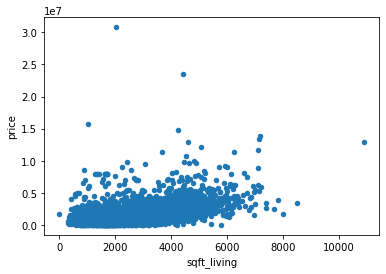

In [10]:
# scatterplot to visualize relationship between sqft_living and price
house_data.plot.scatter(x='sqft_living', y='price');

The scatterplot shows a relatively linear relationship between <b>sqft_living</b> and <b>price</b>. Let's go ahead and create the baseline model.

In [11]:
# generating baseline model
y_baseline = house_data["price"]
X_baseline = house_data[["sqft_living"]]

baseline_model = sm.OLS(y_baseline, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        21:25:59   Log-Likelihood:            -4.4099e+05
No. Observations:               29760   AIC:                         8.820e+05
Df Residuals:                   29758   BIC:                         8.820e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4234.1173   9567.294      0.443      

In [12]:
# calculating overall error of model
mae = baseline_results.resid.abs().sum() / len(y_baseline)
mae

378784.5242821782

From the baseline model we see that the model is statistically significant overall (the p-value for the F-statistic is 0). According to the model, one unit increase in <b>sqft_living</b> will lead to about a $519 increase in price. The t-test p-value for the sqft_living coefficient is significant (p=0.0), but the constant's p-value is not (p=0.658). Based on the adjusted R-squared value, we know that the model explains only about <b>34% of the variance</b> in price. Therefore, this isn't a strong model and needs to be improved further. Let's inspect the distribution of <b>sqft_living</b> to see if it's normal. 

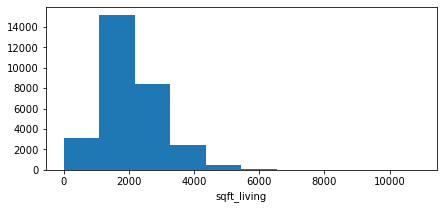

In [13]:
# inspecting distribution of sqft_living
fig, ax = plt.subplots(figsize=(7,3))
ax.hist(house_data['sqft_living'])
ax.set_xlabel("sqft_living");

From the histogram, we see that the <b>sqft_living</b> variable has a slight positive skew. Performing a <b>log transformation</b> on this feature may help normalize the data. 

# Baseline Model: Log Transformed Feature 

In [14]:
# create copy of X_baseline
X_baseline_log = X_baseline.copy()

# perform log transformation
X_baseline_log["log(sqft_living)"] = np.log(X_baseline_log["sqft_living"])

# compare raw vs. transformed values
X_baseline_log[["sqft_living", "log(sqft_living)"]]

,sqft_living,log(sqft_living)
0,1180,7.073270
1,2770,7.926603
2,2880,7.965546
3,2160,7.677864
4,1120,7.021084
...,...,...
30150,1910,7.554859
30151,2020,7.610853
30152,1620,7.390181
30153,2570,7.851661


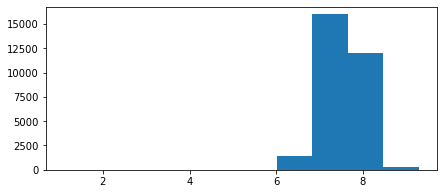

In [15]:
# visualize distribution of log transformed data
fig, ax = plt.subplots(figsize=(7,3))
ax.hist(X_baseline_log['log(sqft_living)']);

In [16]:
# generating new baseline model with log transformed feature (sqft_living)

# dropping original sqft_living column
X_baseline_log.drop("sqft_living", axis=1, inplace=True)

y_baseline_log = house_data['price']
baseline_log_model = sm.OLS(y_baseline_log, sm.add_constant(X_baseline_log))
baseline_log_results = baseline_log_model.fit()

print(baseline_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        21:28:33   Log-Likelihood:            -4.4265e+05
No. Observations:               29760   AIC:                         8.853e+05
Df Residuals:                   29758   BIC:                         8.853e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.122e+06   7.07e+04  

In [17]:
# calculating overall error of model
mae = baseline_log_results.resid.abs().sum() / len(y_baseline_log)
mae

406656.30826155277

By performing a log transformation on the <b>sqft_living</b> feature, we see the model worsen in some aspects. The adjusted R-squared value has decreased from 0.34 to 0.26 and has a significant F-statistic, as indicated by the p-value (p=0.0). This means that the model is predicting about <b>26% of the variation</b> in <b>price</b>. Both the constant and the <b>log(sqft_living)</b> coefficient are significant based on their t-test p-values, which is different from what was seen in the original, non-log-transformed baseline model. According to this model, a 1% increase in sqft_living will lead to about a $95,000 increase in a home's sale price.  

The results aren't what we wanted. Let's see what happens if we log transform only the dependent variable, price.

# Baseline Model: Log Transformed Target

In [19]:
# generating new baseline model with log transformed target (price)

y_log = np.log(y_baseline)
y_log.name = "log(price)"

y_log_model = sm.OLS(y_log, sm.add_constant(X_baseline))
y_log_results = y_log_model.fit()

print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 1.739e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        21:38:26   Log-Likelihood:                -18669.
No. Observations:               29760   AIC:                         3.734e+04
Df Residuals:                   29758   BIC:                         3.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9308      0.007   1967.086      

In [24]:
# calculating overall error of model
mae = y_log_results.resid.abs().sum() / len(y_log)
mae

0.33342553400296604

By performing a log transformation on the target, <b>price</b>, we see an improvement on the adjusted R-squared value, which has increased to about 0.37. This indicates that <b>37% of the variation in price</b> is being detected. The F-statistic also has a significant p-value. For the constant and the sqft_living coefficient, the t-test p-value indicates significance. Based on sqft_living coefficient, each increase of 1 unit in sqft_living has an associated change of 0.04% in price. This model also has the lowest mean absolute error (MAE) by far. The MAE for this model is only 0.33.

Let's see if we can get an even more improved model by transforming both the <b>sqft_living</b> feature and the target <b>price</b>.

# Baseline Model: Log Transformed Feature and Target

In [25]:
# generating new baseline model with log transformed target (price) and log transformed feature (sqft_living)

log_transformed_model = sm.OLS(y_log, sm.add_constant(X_baseline_log))
log_transformed_model_results = log_transformed_model.fit()

print(log_transformed_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                 1.490e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        21:46:58   Log-Likelihood:                -19476.
No. Observations:               29760   AIC:                         3.896e+04
Df Residuals:                   29758   BIC:                         3.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.9749      0.047  

In [26]:
# calculating overall error of model
mae = log_transformed_model_results.resid.abs().sum() / len(y_log)
mae

0.34419514900872095

Compared to the model with only the log transformed target, this model with both a log transformed feature (sqft_living) and target does not perform significantly better. The adjusted R-squared has decreased slightly from 0.37 to 0.33 and has a significant F-statistic, indicating that it detects about <b>33% of the variation in price</b>. The MAE for this model is similar to the log transformed target model, being around 0.34. 

For the final baseline model, I will choose the model with only the log transformed target because it has the highest adjusted R-squared value (0.369) and also has the smallest MAE (~0.33). Now let's look at the categorical variables of the dataset.

## Categorical Variables

For the columns containing <b>categorical</b> information, the data needs to be transformed and one-hot encoded first before a model can be generated. Let's create a copy of the data table with only variables of object dtype present.

In [27]:
# creating copy of data with only obj columns
categorical_data = house_data.select_dtypes(include='object')
# use .head() to visualize first five rows 
categorical_data.head()

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [28]:
# use .info() to confirm only variables of obj dtype are present 
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29760 entries, 0 to 30154
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          29760 non-null  object
 1   waterfront    29760 non-null  object
 2   greenbelt     29760 non-null  object
 3   nuisance      29760 non-null  object
 4   view          29760 non-null  object
 5   condition     29760 non-null  object
 6   grade         29760 non-null  object
 7   heat_source   29760 non-null  object
 8   sewer_system  29760 non-null  object
 9   address       29760 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


Looking at our categorical variables, it would not make sense to look at <b>date</b> and <b>address</b> and their relationship with price, since both of these data vary too much and will most likely not have any discernable pattern. Let's create a new copy of the categorical dataframe that excludes these two columns. I will also add the <b>price</b> column because it's the dependent variable of interest. Furthermore, I will include the <b>bedrooms</b>, <b>bathrooms</b>, and <b>floors</b> columns because even though they have int and float dtypes, they seemed to be more discrete, categorical variables based on the earlier analysis.

In [29]:
# create another copy of categorical dataframe, excluding unnecessary columns
cat_data_edited = house_data[['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source',
                              'sewer_system', 'bedrooms','bathrooms', 'floors', 'price']]
# use .head() to visualize first five rows
cat_data_edited.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors,price
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,4,1.0,1.0,675000.0
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,5,2.5,1.0,920000.0
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,6,2.0,1.0,311000.0
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,3,3.0,2.0,775000.0
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0,592500.0


With the columns in the <b>cat_data_edited</b> dataframe, some edits must be done to make the data more usable. Let's start by creating a new column called <b>rating</b> that extracts the number from grade. 

In [30]:
# creating a new column with just the number from grade
cat_data_edited['rating'] = cat_data_edited['grade'].str.split().apply(lambda x: x[0])
cat_data_edited

<ipython-input-30-00cf2c3f359d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_edited['rating'] = cat_data_edited['grade'].str.split().apply(lambda x: x[0])


,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors,price,rating
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,4,1.0,1.0,675000.0,7
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,5,2.5,1.0,920000.0,7
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,6,2.0,1.0,311000.0,7
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,3,3.0,2.0,775000.0,9
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0,592500.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,5,2.0,1.5,1555000.0,8
30151,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,3,2.0,2.0,1313000.0,7
30152,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,3,2.0,1.0,800000.0,7
30153,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,3,2.5,2.0,775000.0,8


In [31]:
# checking dtype of new column, 'rating'
cat_data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29760 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   waterfront    29760 non-null  object 
 1   greenbelt     29760 non-null  object 
 2   nuisance      29760 non-null  object 
 3   view          29760 non-null  object 
 4   condition     29760 non-null  object 
 5   grade         29760 non-null  object 
 6   heat_source   29760 non-null  object 
 7   sewer_system  29760 non-null  object 
 8   bedrooms      29760 non-null  int64  
 9   bathrooms     29760 non-null  float64
 10  floors        29760 non-null  float64
 11  price         29760 non-null  float64
 12  rating        29760 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.2+ MB


Let's convert rating from an object dtype to an integer so its relationship with price can be graphed.

In [32]:
# convert rating to int dtype
cat_data_edited['rating'] = cat_data_edited['rating'].astype('int64')

<ipython-input-32-aef727951dc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_edited['rating'] = cat_data_edited['rating'].astype('int64')


In [33]:
# checking if dtype of rating was converted successfully
cat_data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29760 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   waterfront    29760 non-null  object 
 1   greenbelt     29760 non-null  object 
 2   nuisance      29760 non-null  object 
 3   view          29760 non-null  object 
 4   condition     29760 non-null  object 
 5   grade         29760 non-null  object 
 6   heat_source   29760 non-null  object 
 7   sewer_system  29760 non-null  object 
 8   bedrooms      29760 non-null  int64  
 9   bathrooms     29760 non-null  float64
 10  floors        29760 non-null  float64
 11  price         29760 non-null  float64
 12  rating        29760 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 3.2+ MB


Now that <b>rating</b> is of int dtype, let's create a scatterplot to visualize its relationship with <b>price</b>. 

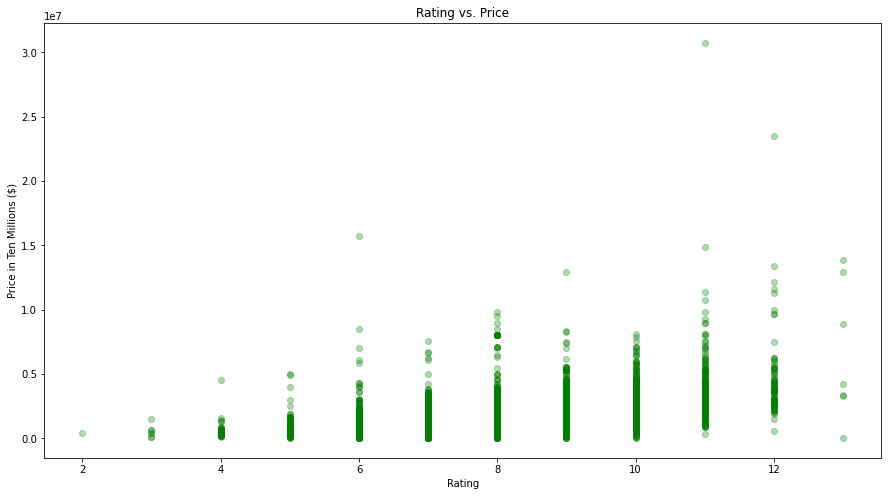

In [34]:
# creating scatterplot to visualize relationship between rating and price
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(cat_data_edited['rating'], cat_data_edited['price'], alpha=0.3, color="green")
ax.set_title("Rating vs. Price")
ax.set_xlabel("Rating")
ax.set_ylabel("Price in Ten Millions ($)");

In [35]:
# checking correlation between rating and price
cat_data_edited.corr()['price']

bedrooms     0.280329
bathrooms    0.444315
floors       0.183087
price        1.000000
rating       0.557879
Name: price, dtype: float64

Using <b>.corr()</b>, we see that the correlation coefficient between <b>rating</b> and <b>price</b> is about 0.56. Let's create a linear regression model with <b>rating</b> as the only independent variable.

In [38]:
y = cat_data_edited["price"]
# log transforming price
log_y = np.log(y)
log_y.name = "log(price)"
X_rating = cat_data_edited[["rating"]]

rating_model = sm.OLS(log_y, sm.add_constant(X_rating))
rating_results = rating_model.fit()

print(rating_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        22:10:57   Log-Likelihood:                -18865.
No. Observations:               29760   AIC:                         3.773e+04
Df Residuals:                   29758   BIC:                         3.775e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3881      0.018    624.340      0.0

In [40]:
# calculating overall error of model
mae = rating_results.resid.abs().sum() / len(log_y)
mae

0.33853423167429186

The linear regression model with <b>rating</b> as the only independent variable is significant, with an F-statistic p-value of 0. Both the constant and the rating coefficient are significant and have a t-test p-value of 0. The coefficient for rating indicates that with each 1% increase in rating, about a $440,000 increase in price is expected. The model has an R-squared value of about 0.36. Compared to the chosen baseline model (with log transformed target), this model is about the same at predicting the variance in price and accounts for about <b>36% of the variation</b>, while the baseline detected about <b>37% of the price's variation</b>. In terms of MAE, this model is similar to the chosen baseline as well, having an MAE of about 0.34.

Let's take a look at some of the other categorical variables to see what could be useful.

In [41]:
cat_data_edited['waterfront'].value_counts()

NO     29275
YES      485
Name: waterfront, dtype: int64

In [42]:
cat_data_edited['greenbelt'].value_counts()

NO     28998
YES      762
Name: greenbelt, dtype: int64

In [43]:
cat_data_edited['nuisance'].value_counts()

NO     24605
YES     5155
Name: nuisance, dtype: int64

In [44]:
cat_data_edited['view'].value_counts()

NONE         26299
AVERAGE       1871
GOOD           860
EXCELLENT      515
FAIR           215
Name: view, dtype: int64

In [45]:
cat_data_edited['condition'].value_counts()

Average      18241
Good          8000
Very Good     3236
Fair           224
Poor            59
Name: condition, dtype: int64

In [46]:
cat_data_edited['heat_source'].value_counts()

Gas                  20297
Electricity           6405
Oil                   2884
Gas/Solar               91
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [47]:
cat_data_edited['sewer_system'].value_counts()

PUBLIC                25462
PRIVATE                4290
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [48]:
cat_data_edited['bedrooms'].value_counts()

3    12746
4     9558
2     3925
5     2704
6      446
1      381
Name: bedrooms, dtype: int64

In [49]:
cat_data_edited['bathrooms'].value_counts()

2.5    8466
2.0    7335
1.0    4541
3.0    4082
3.5    2254
1.5    1806
4.0     616
4.5     516
5.0     135
0.5       5
0.0       4
Name: bathrooms, dtype: int64

In [50]:
cat_data_edited['floors'].value_counts()

1.0    13876
2.0    12032
1.5     2419
3.0     1186
2.5      203
4.0       29
3.5       15
Name: floors, dtype: int64

Looking at the <b>.value_counts()</b> for the other categorical variables, it appears that <b>waterfront</b>, <b>greenbelt</b>, and <b>nuisance</b> are binary, having two categories ('NO' and 'YES'). Meanwhile, <b>view</b> and <b>condition</b> have five categories. For <b>heat_source</b> and <b>sewer_system</b>, the categories have a lot of overlap (i.e. electricity/solar, private/restricted). The number of <b>bedrooms</b> range from 1-6, the number of <b>bathrooms</b> range from 0.0-5.0, and the number of <b>floors</b> range from 1.0-4.0. I will drop the <b>heat_source</b> and <b>sewer_system</b> columns from the dataframe since their categories are not clearly defined. 

In [51]:
# dropping heat_source and sewer_system
cat_data_edited = cat_data_edited.drop('heat_source', axis=1)
cat_data_edited = cat_data_edited.drop('sewer_system', axis=1)
cat_data_edited

,waterfront,greenbelt,nuisance,view,condition,grade,bedrooms,bathrooms,floors,price,rating
0,NO,NO,NO,NONE,Good,7 Average,4,1.0,1.0,675000.0,7
1,NO,NO,YES,AVERAGE,Average,7 Average,5,2.5,1.0,920000.0,7
2,NO,NO,NO,AVERAGE,Average,7 Average,6,2.0,1.0,311000.0,7
3,NO,NO,NO,AVERAGE,Average,9 Better,3,3.0,2.0,775000.0,9
4,NO,NO,YES,NONE,Average,7 Average,2,2.0,2.0,592500.0,7
...,...,...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,5,2.0,1.5,1555000.0,8
30151,NO,NO,NO,FAIR,Average,7 Average,3,2.0,2.0,1313000.0,7
30152,NO,NO,YES,NONE,Average,7 Average,3,2.0,1.0,800000.0,7
30153,NO,NO,NO,NONE,Average,8 Good,3,2.5,2.0,775000.0,8


For the remaining columns, let's create some bar graphs to visualize average price in relation to each variable. I will also employ the <b>.grouby()</b> method to see the mean differences of each category.

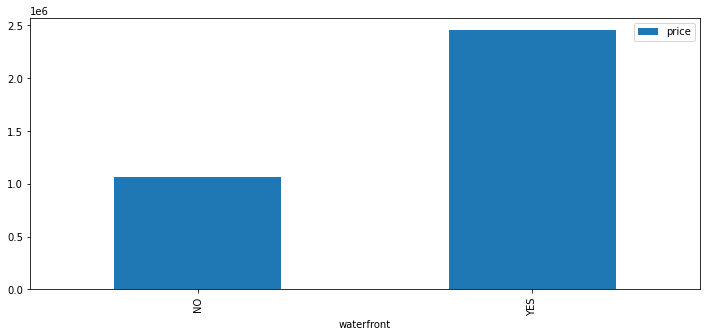

In [52]:
# waterfront vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("waterfront").mean().plot.bar(y="price", ax=ax);

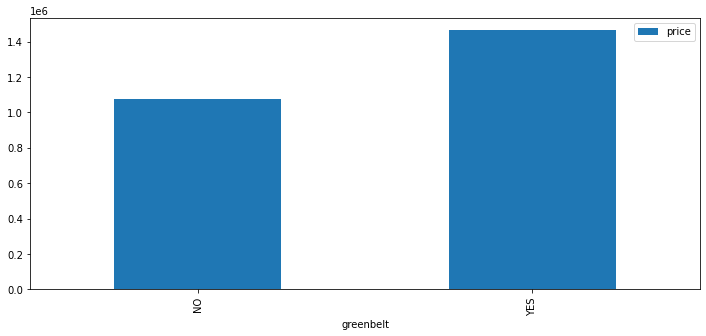

In [53]:
# greenbelt vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("greenbelt").mean().plot.bar(y="price", ax=ax);

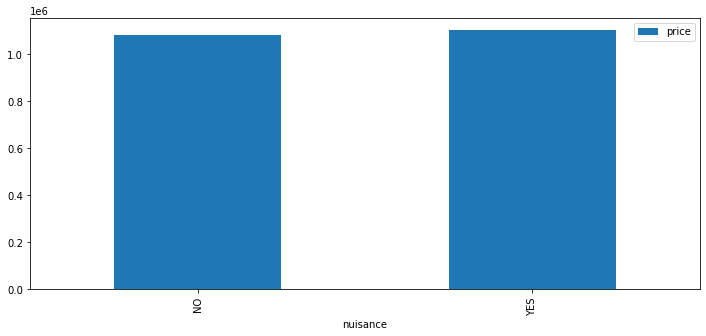

In [54]:
# nuisance vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("nuisance").mean().plot.bar(y="price", ax=ax);

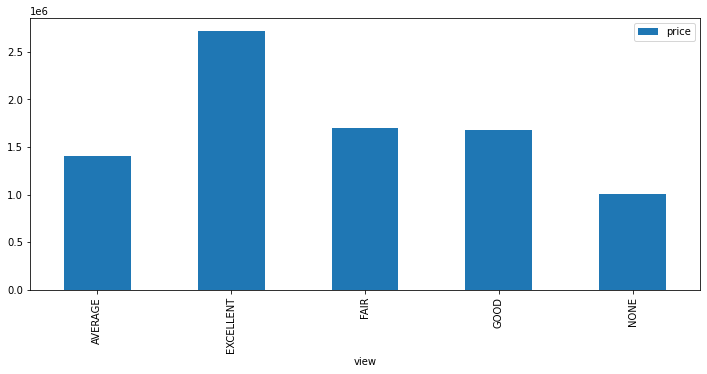

In [55]:
# view vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("view").mean().plot.bar(y="price", ax=ax);

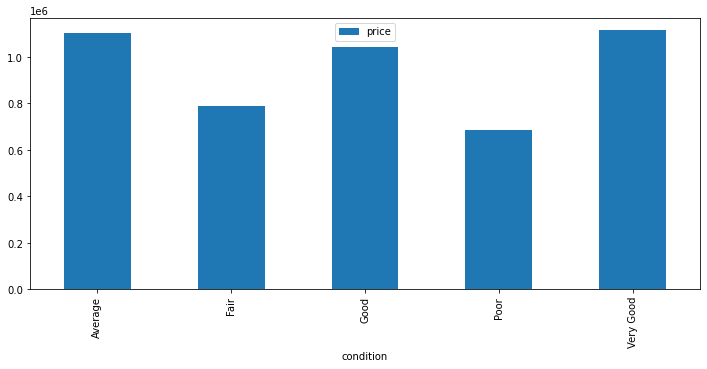

In [56]:
# condition vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("condition").mean().plot.bar(y="price", ax=ax);

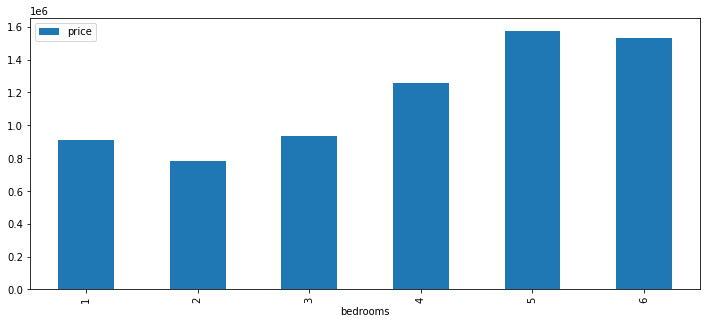

In [57]:
# bedrooms vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("bedrooms").mean().plot.bar(y="price", ax=ax);

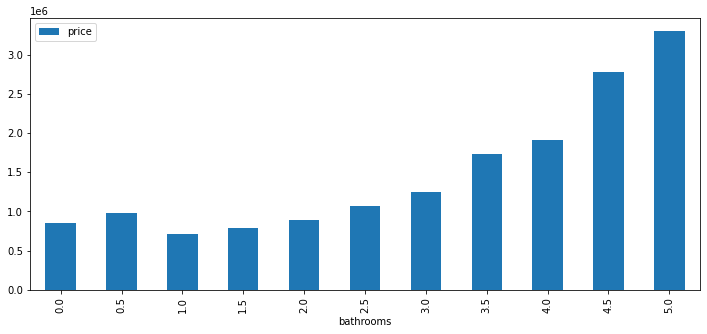

In [58]:
# bathrooms vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("bathrooms").mean().plot.bar(y="price", ax=ax);

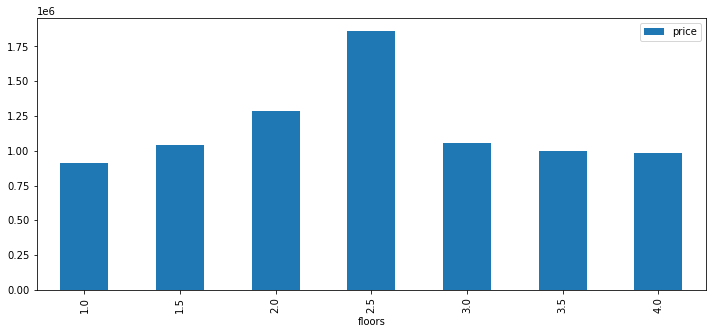

In [59]:
# floors vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("floors").mean().plot.bar(y="price", ax=ax);

Looking at the three binary variables (<b>waterfront</b>, <b>greenbelt</b>, and <b>nuisance</b>), it appears that having a waterfront versus not having one makes a difference in mean price, having a greenbelt versus not having one makes a slight difference in mean price, and nuisance does not make much of a difference in mean price. Specifically, the presence of a waterfront and greenbelt generally increases the price of a home, simply based on the bar graph visualizations of the raw data. 

For <b>view</b>, houses rated 'excellent' had a higher mean price than those rated 'none'. For <b>condition</b>, houses with 'average', 'very good', and 'good' ratings had a greater mean price than those rated 'poor', with 'average' having the highest mean price overall, which was surprising. 

For the <b>bedrooms</b> and <b>bathrooms</b> bar graphs, we see a negative skew, while the bar graph for <b>floors</b> is normal.

Let's create a linear regression model incorporating these categorical variables plus rating. However, before the model can be made, the strings in the <b>waterfront</b>, <b>greenbelt</b>, <b>nuisance</b>, <b>view</b>, and <b>condition</b> columns need to be converted into stand-in integers. 

In [60]:
# Adapted from Morgan Jones' code 
# https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb

from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable, while dropping any duplicates
le.fit(cat_data_edited['waterfront'].drop_duplicates()) 
# create new waterfront variable with label encoded values
cat_data_edited['waterfront'] = le.transform(cat_data_edited['waterfront'])

# fit the label encoder to the greenbelt variable, while dropping any duplicates
le.fit(cat_data_edited['greenbelt'].drop_duplicates()) 
# create new greenbelt variable with label encoded values
cat_data_edited['greenbelt'] = le.transform(cat_data_edited['greenbelt'])

# fit the label encoder to the nuisance variable, while dropping any duplicates
le.fit(cat_data_edited['nuisance'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['nuisance'] = le.transform(cat_data_edited['nuisance'])

# fit the label encoder to the view variable, while dropping any duplicates
le.fit(cat_data_edited['view'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['view'] = le.transform(cat_data_edited['view'])

# fit the label encoder to the condition variable, while dropping any duplicates
le.fit(cat_data_edited['condition'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['condition'] = le.transform(cat_data_edited['condition'])

We can see that the data in the waterfront, greenbelt, nuisance, view, and condition columns were successfully transformed. 

In [61]:
cat_data_edited.head()

,waterfront,greenbelt,nuisance,view,condition,grade,bedrooms,bathrooms,floors,price,rating
0,0,0,0,4,2,7 Average,4,1.0,1.0,675000.0,7
1,0,0,1,0,0,7 Average,5,2.5,1.0,920000.0,7
2,0,0,0,0,0,7 Average,6,2.0,1.0,311000.0,7
3,0,0,0,0,0,9 Better,3,3.0,2.0,775000.0,9
4,0,0,1,4,0,7 Average,2,2.0,2.0,592500.0,7


Now that everything has been converted to integer stand-ins, we can use the <b>pd.get_dummies</b> function to create dummy variables. To avoid the dummy variable trap (perfect multicolinearity), we will use <b>.drop()</b> and specify a reference column. Then, we can create our linear regression model.

In [63]:
# creating model of multiple categorical variables
X_cat = cat_data_edited[["waterfront", "greenbelt", "nuisance", "view", "condition", "bedrooms", "bathrooms",
                     "floors", "rating"]]

# get dummy variables
X_cat = pd.get_dummies(X_cat, columns=["rating"])
X_cat = X_cat.drop("rating_13", axis=1) # rating_13 is the reference col to drop

# create linear regression model
cat_model = sm.OLS(log_y, sm.add_constant(X_cat)) # log transformed target used
cat_results = cat_model.fit()

print(cat_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1164.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        22:24:12   Log-Likelihood:                -17244.
No. Observations:               29760   AIC:                         3.453e+04
Df Residuals:                   29740   BIC:                         3.469e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3066      0.165     86.759      0.0

In [64]:
# calculating overall error of model
mae = cat_results.resid.abs().sum() / len(log_y)
mae

0.314755141244796

This linear regression model incorporating all the categorical variables of interest shows an adjusted R-squared value of 0.426. This is an improvement from the chosen baseline model, indicating that this model predicts about <b>43% of the variation in price</b>. The MAE is also lower than the chosen baseline, being about 0.31. However, this model incorporates many variables to achieve its higher adjusted R-squared value. Let's see what happens when we combine our <b>baseline model</b> (which only had <b>sqft_living</b> as an independent variable) with this model. 

# Numeric and Categorical Variables

We looked at linear regression models with numeric and categorical variables separately. Let's create a model that incorporates both of these types. First, the transformations that were performed on the <b>cat_data_edited</b> dataframe copy need to be performed on the original dataframe, <b>house_data</b>. 

In [65]:
# Adapted from Morgan Jones' code 
# https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb

from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable, while dropping any duplicates
le.fit(house_data['waterfront'].drop_duplicates()) 
# create new waterfront variable with label encoded values
house_data['waterfront'] = le.transform(house_data['waterfront'])

# fit the label encoder to the greenbelt variable, while dropping any duplicates
le.fit(house_data['greenbelt'].drop_duplicates()) 
# create new greenbelt variable with label encoded values
house_data['greenbelt'] = le.transform(house_data['greenbelt'])

# fit the label encoder to the nuisance variable, while dropping any duplicates
le.fit(house_data['nuisance'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['nuisance'] = le.transform(house_data['nuisance'])

# fit the label encoder to the view variable, while dropping any duplicates
le.fit(house_data['view'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['view'] = le.transform(house_data['view'])

# fit the label encoder to the condition variable, while dropping any duplicates
le.fit(house_data['condition'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['condition'] = le.transform(house_data['condition'])

In [66]:
house_data['rating'] = house_data['grade'].str.split().apply(lambda x: x[0])
house_data['rating'] = house_data['rating'].astype('int64')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,rating
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,7
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,7
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,7
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,9
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,7


In [67]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29760 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29760 non-null  int64  
 1   date           29760 non-null  object 
 2   price          29760 non-null  float64
 3   bedrooms       29760 non-null  int64  
 4   bathrooms      29760 non-null  float64
 5   sqft_living    29760 non-null  int64  
 6   sqft_lot       29760 non-null  int64  
 7   floors         29760 non-null  float64
 8   waterfront     29760 non-null  int32  
 9   greenbelt      29760 non-null  int32  
 10  nuisance       29760 non-null  int32  
 11  view           29760 non-null  int32  
 12  condition      29760 non-null  int32  
 13  grade          29760 non-null  object 
 14  heat_source    29760 non-null  object 
 15  sewer_system   29760 non-null  object 
 16  sqft_above     29760 non-null  int64  
 17  sqft_basement  29760 non-null  int64  
 18  sqft_g

Now that everything's been transformed successfully, we can create our linear regression model. 

In [68]:
# creating linear regression model with all categorical variables plus highest-correlated numeric variable (sqft_living)
y_combined = y_log
X_combined = house_data[["sqft_living", "rating", "bedrooms", "bathrooms", "floors", "waterfront", "view", "condition",
               "greenbelt", "nuisance"]]
X_combined = pd.get_dummies(X_combined, columns=['rating'])
X_combined = X_combined.drop('rating_13', axis=1) 

combined_model = sm.OLS(y_combined, sm.add_constant(X_combined))
combined_results = combined_model.fit()

print(combined_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1229.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        22:28:41   Log-Likelihood:                -16555.
No. Observations:               29760   AIC:                         3.315e+04
Df Residuals:                   29739   BIC:                         3.333e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.4315      0.163     82.499      

In [69]:
# calculating overall error of model
mae = combined_results.resid.abs().sum() / len(y_combined)
mae

0.30419033525145794

This model incorporating the categorical variables of interest plus <b>sqft_living</b> has an R-squared value of 0.452 and has a significant F-statistic. In other words, about <b>45% of the variation</b> in price is accounted for, making this the best model so far at predicting price's variance. Most of the coefficients for each independent variable are significant at an alpha of 0.05, but some of the dummy variables for <b>rating</b> are not. As mentioned earlier with the categorical model, there are many variables. Let's look at a heatmap of all the variables in the model to decide which ones to drop.

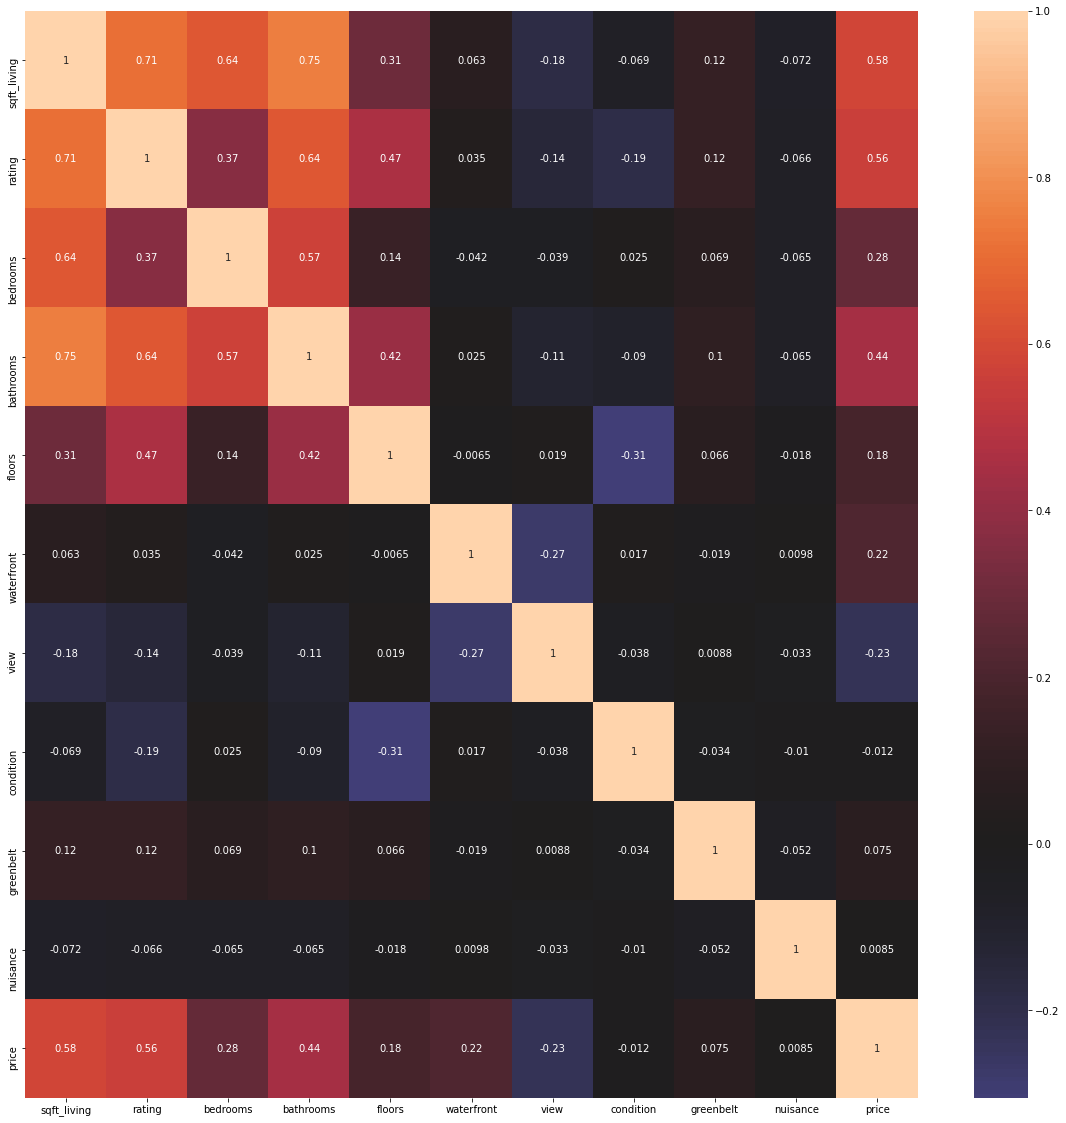

In [71]:
house_data_subset = house_data[["sqft_living", "rating", "bedrooms", "bathrooms", "floors", "waterfront", "view", 
                                "condition", "greenbelt", "nuisance", "price"]]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(house_data_subset.corr(), center=0, annot=True);

From the heatmap, we see that <b>sqft_living</b>, <b>rating</b>, and <b>bathrooms</b> have the highest correlations with <b>price</b>. Let's get rid of the rest of the variables from our model and see what happens.

In [102]:
# revised linear regression model with reduced number of variables
y_reduced = y_log
X_reduced = house_data[["sqft_living", "rating", "bathrooms"]]
X_reduced = pd.get_dummies(X_reduced, columns=['rating'])
X_reduced = X_reduced.drop('rating_13', axis=1) 

reduced_model = sm.OLS(y_reduced, sm.add_constant(X_reduced))
reduced_results = reduced_model.fit()

print(reduced_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1723.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        23:15:14   Log-Likelihood:                -17165.
No. Observations:               29760   AIC:                         3.436e+04
Df Residuals:                   29746   BIC:                         3.447e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.3492      0.165     80.732      

In [85]:
# calculating overall model error
mae = reduced_results.resid.abs().sum() / len(y_reduced)
mae

0.3118731070886834

The adjusted R-squared for the model with <b>sqft_living</b>, <b>rating</b> and <b>bathrooms</b> has an adjusted R-squared value of 0.429, indicating that this model predicts <b>about 43% of the variation</b> in price. 

Let's consider this to be our <b>final model</b>.

# Multiple Linear Regression Assumptions

For the final model, let's make sure all assumptions of linear regression have been met. They are as follows:

1. <b>Linear relationship</b> between dependent and independent variables

2. <b>No multicollinearity</b>

3. <b>Homoscedasticity</b>

4. Residuals have a <b>normal distribution</b>

# Linear Relationship and Multicollinearity

For these two assumptions, a heatmap is worth looking at again.

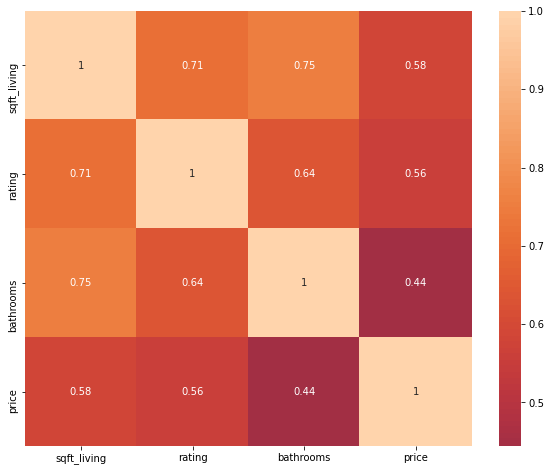

In [90]:
# creating heatmap to visualize correlations between final model variables
house_data_subset = house_data[["sqft_living", "rating", "bathrooms", "price"]]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(house_data_subset.corr(), center=0, annot=True);

From the heatmap, we see slight multicollinearity with regards to <b>sqft_living</b>, <b>rating</b>, and <b>bathrooms</b>. We also see linearity between <b>price</b> and the dependent variables.

# Normality

One of the assumptions of linear regression is normality of the residuals. Let's create a QQ plot to visualize the normality of the final model's residuals.

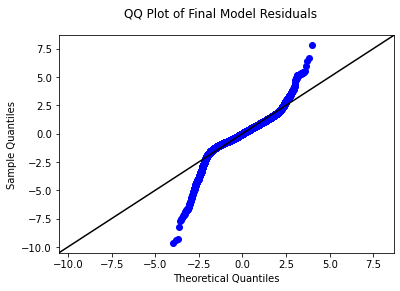

In [93]:
# creating qq-plot of chosen model's residuals
fig, ax = plt.subplots()
sm.graphics.qqplot(reduced_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

line = ax.lines[1]
line.set_color("black")
fig.suptitle("QQ Plot of Final Model Residuals");

In [94]:
# checking Jarque-Bera number of reduced model
# calculating overall model error
print(reduced_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1723.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        22:54:04   Log-Likelihood:                -17165.
No. Observations:               29760   AIC:                         3.436e+04
Df Residuals:                   29746   BIC:                         3.447e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.3492      0.165     80.732      

From the QQ plot, we see some normality in the center. However, on either end of the graph, normality is violated, as indicated by deviations from the reference line. This supports the Jarque-Bera statistic in the reduced (final) model results summary, which is high and has a significant p-value, indicating that the null hypothesis (the distribution is normal) is rejected. 

# Homoscedasticity

For the homoscedasticity assumption to be met, the errors of the residuals should be symmetrical. We can visualize this using Seaborn's <b>.regplot()</b> method.

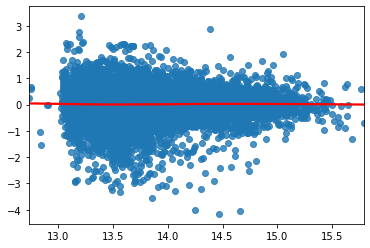

In [95]:
sns.regplot(x=reduced_results.predict(), y=reduced_results.resid, lowess=True, line_kws={'color': 'red'});

From the plot, we see some symmetricality of the final model's residuals in the middle. However, the ends of the graph are unbalanced, showing a huge contrast in the concentration of points between the leftmost and rightmost ends of the plot.   

# Final Model

In [97]:
# revisiting final model
y_final = y_log
X_final = house_data[["sqft_living", "rating", "bathrooms"]]
X_final = pd.get_dummies(X_final, columns=['rating'])
X_final = X_final.drop('rating_13', axis=1) 

final_model = sm.OLS(y_reduced, sm.add_constant(X_reduced))
final_mod_results = final_model.fit()

print(final_mod_results.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1723.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        23:04:58   Log-Likelihood:                -17165.
No. Observations:               29760   AIC:                         3.436e+04
Df Residuals:                   29746   BIC:                         3.447e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.3492      0.165     80.732      

In [98]:
# revisiting overall model error
mae_final_mod = reduced_results.resid.abs().sum() / len(y_reduced)
mae_final_mod

0.3118731070886834

## Conclusions

Based on the final linear regression model and overall data analysis, I would suggest that renovations should be focused on increasing <b>sqft_living</b>, targeting a <b>rating</b> of 9-13, and having at least () <b>bathrooms</b>. 

## Limitations and Future Improvements

In terms of limitations, it should be noted that there were very few variables in the dataset that had a high correlation with sale price. The highest correlation was <b>sqft_living</b>, but even this column's correlation coefficient was only about 0.6. Furthermore, <b>sqft_living</b> correlated with many other variables. The other assumptions of linear

Assumptions not met entirely